In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
#import the titanic dataset
titanic=sns.load_dataset('titanic')
titanic.head()


survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True

In [6]:
type(titanic)
Y=titanic.iloc[:,13:14].values
X = np.concatenate((titanic.iloc[:, :12].values, titanic.iloc[:, 14:].values), axis=1)

In [7]:
pd.set_option('display.max_rows',15)
pd.set_option('display.max_columns',None)

In [8]:
titanic

survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
0           0       3    male  22.0      1      0   7.2500        S   Third   
1           1       1  female  38.0      1      0  71.2833        C   First   
2           1       3  female  26.0      0      0   7.9250        S   Third   
3           1       1  female  35.0      1      0  53.1000        S   First   
4           0       3    male  35.0      0      0   8.0500        S   Third   
..        ...     ...     ...   ...    ...    ...      ...      ...     ...   
886         0       2    male  27.0      0      0  13.0000        S  Second   
887         1       1  female  19.0      0      0  30.0000        S   First   
888         0       3  female   NaN      1      2  23.4500        S   Third   
889         1       1    male  26.0      0      0  30.0000        C   First   
890         0       3    male  32.0      0      0   7.7500        Q   Third   

       who  adult_male deck  embark_town alive  alone  
0      man        True  NaN  Southampton    no  False  
1    woman       False    C    Cherbourg   yes  False  
2    woman       False  NaN  Southampton   yes   True  
3    woman       False    C  Southampton   yes  False  
4      man        True  NaN  Southampton    no   True  
..     ...         ...  ...          ...   ...    ...  
886    man        True  NaN  Southampton    no   True  
887  woman       False    B  Southampton   yes   True  
888  woman       False  NaN  Southampton    no  False  
889    man        True    C    Cherbourg   yes   True  
890    man        True  NaN   Queenstown    no   True  

[891 rows x 15 columns]

In [9]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [10]:
titanic.shape

(891, 15)

In [11]:
titanic.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [12]:
unq=titanic.nunique()
unq

survived         2
pclass           3
sex              2
age             88
sibsp            7
parch            7
fare           248
embarked         3
class            3
who              3
adult_male       2
deck             7
embark_town      3
alive            2
alone            2
dtype: int64

In [13]:
#unique()
parchunq=titanic['parch'].unique()
parchunq

array([0, 1, 2, 5, 3, 4, 6], dtype=int64)

In [14]:
#value_counts()
parchunqc=titanic['parch'].value_counts()
parchunqc

parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64

In [15]:
survivedc=titanic['survived'].value_counts()
print(survivedc)

survived
0    549
1    342
Name: count, dtype: int64


In [16]:
df=titanic

In [17]:
grouped_data=df.groupby(['sex','survived'])['survived'].count()
print(grouped_data)

sex     survived
female  0            81
        1           233
male    0           468
        1           109
Name: survived, dtype: int64


In [18]:
class_survived_count=df.groupby(['pclass','survived'])['survived'].count()
class_survived_count

pclass  survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
Name: survived, dtype: int64

In [19]:
em_survived_count=df.groupby(['embark_town','survived'])['survived'].count()
em_survived_count

embark_town  survived
Cherbourg    0            75
             1            93
Queenstown   0            47
             1            30
Southampton  0           427
             1           217
Name: survived, dtype: int64

In [20]:
sns.countplot(x='sex',hue='survived',data=titanic)
plt.xlabel('Gender')
plt.ylabel('Numberof passengers')
plt.title('Survival by Gender')
plt.show()

In [21]:
sns.countplot(x='pclass',hue='survived',data=titanic)
plt.xlabel('P class')
plt.ylabel('Number of passengers')
plt.title('Survival by P class')
plt.show()


In [22]:
#plotting with cat plot,catplot can plot categorical data
sns.catplot(x="embark_town",hue='survived',col='pclass',data=titanic,kind='count',palette='Set2')
plt.xlabel('Embarkation town') #col=subplot
plt.ylabel('Count of passengers')
plt.suptitle('Survival by emb town and passenger class')
plt.show()

c:\Users\OMEN 0136AX\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


In [23]:
df.describe()

survived      pclass         age       sibsp       parch        fare
count  891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.699118    0.523008    0.381594   32.204208
std      0.486592    0.836071   14.526497    1.102743    0.806057   49.693429
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   20.125000    0.000000    0.000000    7.910400
50%      0.000000    3.000000   28.000000    0.000000    0.000000   14.454200
75%      1.000000    3.000000   38.000000    1.000000    0.000000   31.000000
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200

In [24]:
df['embark_town'].describe()

count             889
unique              3
top       Southampton
freq              644
Name: embark_town, dtype: object

In [25]:
#drop cols
print(df['survived'].value_counts())
print(df['alive'].value_counts())

survived
0    549
1    342
Name: count, dtype: int64
alive
no     549
yes    342
Name: count, dtype: int64


In [26]:
df.drop(columns=['alive'],inplace=True)

In [27]:
print(df.columns)

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alone'],
      dtype='object')


In [28]:
print(df['embarked'].value_counts())
print(df['embark_town'].value_counts())

embarked
S    644
C    168
Q     77
Name: count, dtype: int64
embark_town
Southampton    644
Cherbourg      168
Queenstown      77
Name: count, dtype: int64


In [29]:
df.drop(columns=['embarked'],inplace=True)

In [30]:
print(df['class'].value_counts())
print(df['pclass'].value_counts())

class
Third     491
First     216
Second    184
Name: count, dtype: int64
pclass
3    491
1    216
2    184
Name: count, dtype: int64


In [31]:
df.drop(columns=['class'],inplace=True)

In [32]:
df

survived  pclass     sex   age  sibsp  parch     fare    who  adult_male  \
0           0       3    male  22.0      1      0   7.2500    man        True   
1           1       1  female  38.0      1      0  71.2833  woman       False   
2           1       3  female  26.0      0      0   7.9250  woman       False   
3           1       1  female  35.0      1      0  53.1000  woman       False   
4           0       3    male  35.0      0      0   8.0500    man        True   
..        ...     ...     ...   ...    ...    ...      ...    ...         ...   
886         0       2    male  27.0      0      0  13.0000    man        True   
887         1       1  female  19.0      0      0  30.0000  woman       False   
888         0       3  female   NaN      1      2  23.4500  woman       False   
889         1       1    male  26.0      0      0  30.0000    man        True   
890         0       3    male  32.0      0      0   7.7500    man        True   

    deck  embark_town  alone  
0    NaN  Southampton  False  
1      C    Cherbourg  False  
2    NaN  Southampton   True  
3      C  Southampton  False  
4    NaN  Southampton   True  
..   ...          ...    ...  
886  NaN  Southampton   True  
887    B  Southampton   True  
888  NaN  Southampton  False  
889    C    Cherbourg   True  
890  NaN   Queenstown   True  

[891 rows x 12 columns]

In [33]:
df['alone'].replace({True:1,False:0},inplace=True)

C:\Users\OMEN 0136AX\AppData\Local\Temp\ipykernel_20340\2182470413.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['alone'].replace({True:1,False:0},inplace=True)
C:\Users\OMEN 0136AX\AppData\Local\Temp\ipykernel_20340\2182470413.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['alone']

In [34]:
df

survived  pclass     sex   age  sibsp  parch     fare    who  adult_male  \
0           0       3    male  22.0      1      0   7.2500    man        True   
1           1       1  female  38.0      1      0  71.2833  woman       False   
2           1       3  female  26.0      0      0   7.9250  woman       False   
3           1       1  female  35.0      1      0  53.1000  woman       False   
4           0       3    male  35.0      0      0   8.0500    man        True   
..        ...     ...     ...   ...    ...    ...      ...    ...         ...   
886         0       2    male  27.0      0      0  13.0000    man        True   
887         1       1  female  19.0      0      0  30.0000  woman       False   
888         0       3  female   NaN      1      2  23.4500  woman       False   
889         1       1    male  26.0      0      0  30.0000    man        True   
890         0       3    male  32.0      0      0   7.7500    man        True   

    deck  embark_town  alone  
0    NaN  Southampton      0  
1      C    Cherbourg      0  
2    NaN  Southampton      1  
3      C  Southampton      0  
4    NaN  Southampton      1  
..   ...          ...    ...  
886  NaN  Southampton      1  
887    B  Southampton      1  
888  NaN  Southampton      0  
889    C    Cherbourg      1  
890  NaN   Queenstown      1  

[891 rows x 12 columns]

In [35]:
titanic.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'who',
       'adult_male', 'deck', 'embark_town', 'alone'],
      dtype='object')

In [36]:
titanic=sns.load_dataset('titanic')
print(titanic['who'].value_counts())
print(titanic['sex'].value_counts())

who
man      537
woman    271
child     83
Name: count, dtype: int64
sex
male      577
female    314
Name: count, dtype: int64


In [37]:
print(titanic.head())
print(df.head())

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  
   survived  pclass     sex   age  sibsp  parch     fare    who  adult_male  \
0         0       3    male  22.0      1      0   7.2500    man        True   
1         1       1  female  38.0      1      0  71.2833  wom

In [38]:
df['adult_male'].replace({True:1,False:0},inplace=True)

C:\Users\OMEN 0136AX\AppData\Local\Temp\ipykernel_20340\3204879809.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['adult_male'].replace({True:1,False:0},inplace=True)
C:\Users\OMEN 0136AX\AppData\Local\Temp\ipykernel_20340\3204879809.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['ad

In [39]:
df.head()

survived  pclass     sex   age  sibsp  parch     fare    who  adult_male  \
0         0       3    male  22.0      1      0   7.2500    man           1   
1         1       1  female  38.0      1      0  71.2833  woman           0   
2         1       3  female  26.0      0      0   7.9250  woman           0   
3         1       1  female  35.0      1      0  53.1000  woman           0   
4         0       3    male  35.0      0      0   8.0500    man           1   

  deck  embark_town  alone  
0  NaN  Southampton      0  
1    C    Cherbourg      0  
2  NaN  Southampton      1  
3    C  Southampton      0  
4  NaN  Southampton      1

In [41]:
#handling missing values
#MCompletelyAR-completely random missing values
#MNotCompletelyAR-depends on the value itself
#MAR-on some observable variable but not directly related to the missing value itself
print(df.isnull().sum()) #insa() also works

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
who              0
adult_male       0
deck           688
embark_town      2
alone            0
dtype: int64


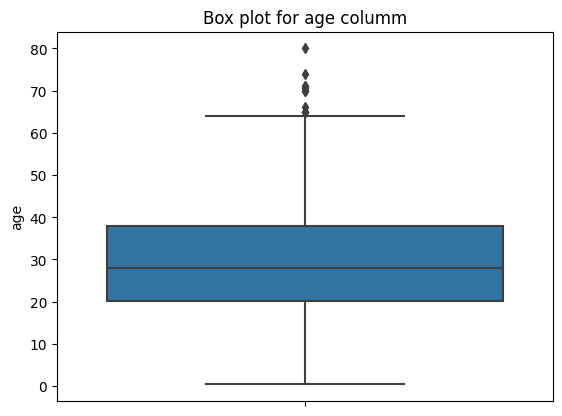

In [42]:
#identify outliers using boxplot
sns.boxplot(y='age',data=df)
plt.title('Box plot for age columm')
plt.show()

In [43]:
#outliers are present above 60 mark so mean can lead to wrong data imputation
#go with median data
#median imputation
df['age']=df['age'].fillna(df['age'].median())


In [45]:
print(df.isnull().sum())

survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
who              0
adult_male       0
deck           688
embark_town      2
alone            0
dtype: int64


In [52]:
emb_mode=df['deck'].mode()[0]
df['deck']=df['deck'].fillna(emb_mode)


In [53]:
print(df.isnull().sum())

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
who            0
adult_male     0
deck           0
embark_town    2
alone          0
dtype: int64


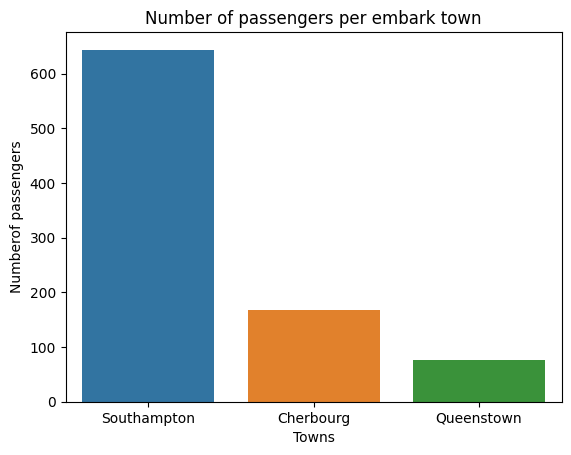

In [56]:
sns.countplot(x='embark_town',data=titanic)
plt.xlabel('Towns')
plt.ylabel('Numberof passengers')
plt.title('Number of passengers per embark town')
plt.show()

In [59]:
df.dropna(subset=['embark_town'],inplace=True)

In [61]:
df.isna().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
who            0
adult_male     0
deck           0
embark_town    0
alone          0
dtype: int64

In [62]:
df.head()

survived  pclass     sex   age  sibsp  parch     fare    who  adult_male  \
0         0       3    male  22.0      1      0   7.2500    man           1   
1         1       1  female  38.0      1      0  71.2833  woman           0   
2         1       3  female  26.0      0      0   7.9250  woman           0   
3         1       1  female  35.0      1      0  53.1000  woman           0   
4         0       3    male  35.0      0      0   8.0500    man           1   

  deck  embark_town  alone  
0    C  Southampton      0  
1    C    Cherbourg      0  
2    C  Southampton      1  
3    C  Southampton      0  
4    C  Southampton      1

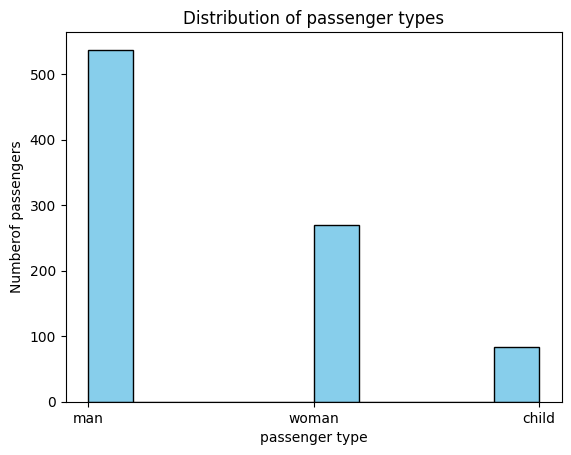

In [63]:
plt.hist(df['who'],color='skyblue',edgecolor='black')
plt.xlabel('passenger type')
plt.ylabel('Numberof passengers')
plt.title('Distribution of passenger types')
plt.show()

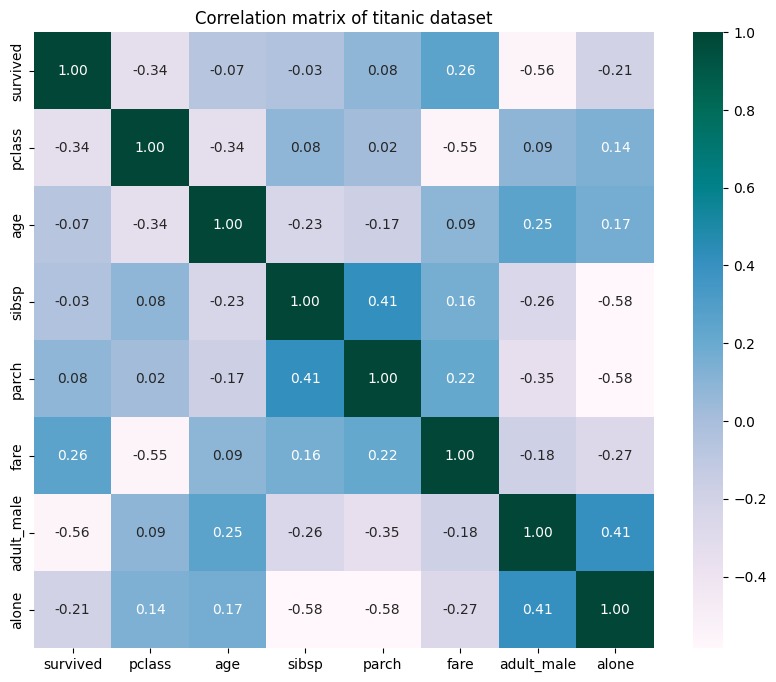

In [67]:
#men were the main bread winner of that time
#correlation matrix-correlation between 2 variables
#-1 negative correlation
#0 no correlation
#1 high correlation
numeric_df=df.select_dtypes(include=['int64','float64'])
corr_matrix=numeric_df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix,annot=True,cmap='PuBuGn',fmt='.2f')
plt.title('Correlation matrix of titanic dataset')
plt.show()

In [ ]:
#0.3 to 0.7 = moderate correlation , noticable but not perfect,other factors also responsible 
#0.7 to 0.9 = strong correlation, good prediction
#0.9 to 1 = very strong correlation, excellent prediction
#0.1 to 0.3 weak relation, may not be significant meaning
#from our data adult males are least likely to survive